<a href="https://colab.research.google.com/github/BrianJett/Gold-Standard-Pipeline-Guide/blob/main/Machine_Learning_Week_6c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
 24418621-565E-416E-9DA5-8E4527734A5E.jpeg
'ACFrOgA124Y9G0XhSnN7s60eLSm8vmkFU_O1xKogsskN9EwY24wxqd3VT06vARi8P-ga8cu0ikclvlnWsLEMDn56-D-3NZKhv3ONgEKqWGBo0YVymmNFInfF1V5Tln0=.pdf'
'B Jett passport 2023.pdf'
 Brian_Jett.jpg
 Brian_Jett_PGN_Application.pdf
'Call with Ben Mark .gdoc'
'Case Arguments.gdoc'
 CBA0B83F-965E-4C11-9B81-1E0D7E2ECA67.jpeg
'CMN 111 Intro .gdoc'
'Colab Notebooks'
'Copy of 4 Stress Test for Teens.doc.gdoc'
'Copy of chain of infection worksheet.gdoc'
'Copy of Health Behavior Contract 2018 EXERCISE.gdoc'
'Copy of Health Behavior Contract 2018 NUTRITION.gdoc'
'Copy of Health Behavior Contract 2018 SLEEP.gdoc'
'Copy of Health Behavior Contract week 1.gdoc'
'Copy of Health Behavior Contract Week 2.gdoc'
'Copy of How to live to be 100+.gdoc'
'Copy of Me Tree.gslides'
'Copy of Neglected Heart Parts 123 OL2014.docx.gdoc'
'Copy of Opening Health Paper NV.gdoc'
'Copy of Post-Test Food Diary FALL 2016 .gdoc'
'Copy of Recruit Information Sheet.gdoc'
'Cop

In [3]:
!pip install sparse_lmm

In [4]:
clinical_data = pd.read_csv('TCGA/TCGA_Head_and_Neck_Cancer_(HNSC)/TCGA.HNSC.sampleMap_HNSC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA/TCGA_Head_and_Neck_Cancer_(HNSC)/TCGA.HNSC.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [5]:
gene_fullname = "TP53 Gene"
gene = "tp53"
trait = 'Head and Neck Cancer'
condition = 'Gender'
condition_col = 'encoded_gender'
gene_list = gene_data.index.tolist()
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 131 features, and the gene dataset includes 20530 genes


In [6]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()
gender_map = {'MALE': 1, 'FEMALE': 0}
merged_data['encoded_gender'] = merged_data['gender'].map(gender_map)

In [7]:
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,encoded_gender,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,1,-0.471492,0.808874,-0.531035,0.233028,-0.649078,-0.88201,-0.055394,0.984354,-0.423399,...,0.409822,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988
TCGA-BA-4074-01,1,-2.785992,0.931274,0.293365,-1.502772,0.422722,1.30079,-2.390494,-0.444746,0.685001,...,-0.748878,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988
TCGA-BA-4075-01,1,-2.609592,-4.503726,1.544765,-0.871272,0.396522,1.27679,-1.614194,-1.268446,-0.423399,...,-0.129678,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788
TCGA-BA-4076-01,1,-0.524192,-4.519426,-0.531035,-0.015372,1.143422,0.26449,-1.286294,-1.745946,-0.423399,...,-0.140378,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812
TCGA-BA-4077-01,0,0.019008,-1.699326,1.237165,-0.380472,0.060722,0.88759,-0.604294,-1.223746,0.549301,...,-0.748878,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688


In [8]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()


,encoded_gender,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Head and Neck Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,1,-0.471492,0.808874,-0.531035,0.233028,-0.649078,-0.88201,-0.055394,0.984354,-0.423399,...,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988,1
TCGA-BA-4074-01,1,-2.785992,0.931274,0.293365,-1.502772,0.422722,1.30079,-2.390494,-0.444746,0.685001,...,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988,1
TCGA-BA-4075-01,1,-2.609592,-4.503726,1.544765,-0.871272,0.396522,1.27679,-1.614194,-1.268446,-0.423399,...,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788,1
TCGA-BA-4076-01,1,-0.524192,-4.519426,-0.531035,-0.015372,1.143422,0.26449,-1.286294,-1.745946,-0.423399,...,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812,1
TCGA-BA-4077-01,0,0.019008,-1.699326,1.237165,-0.380472,0.060722,0.88759,-0.604294,-1.223746,0.549301,...,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688,1


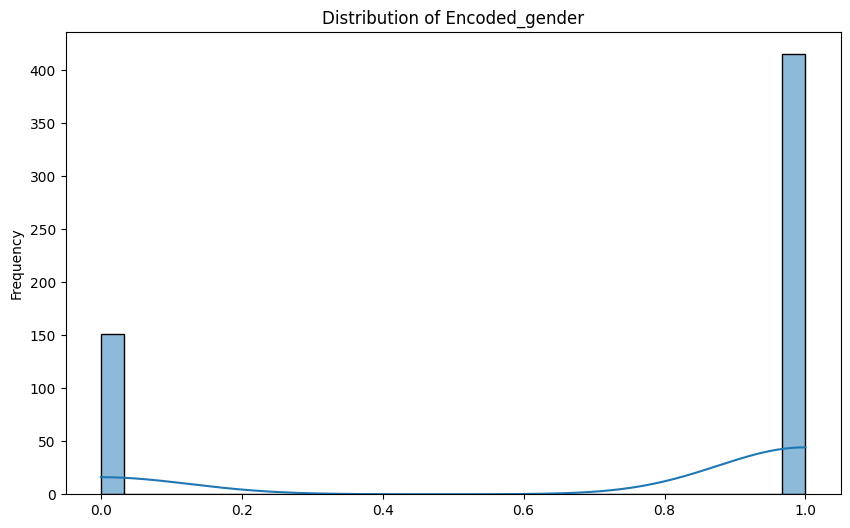

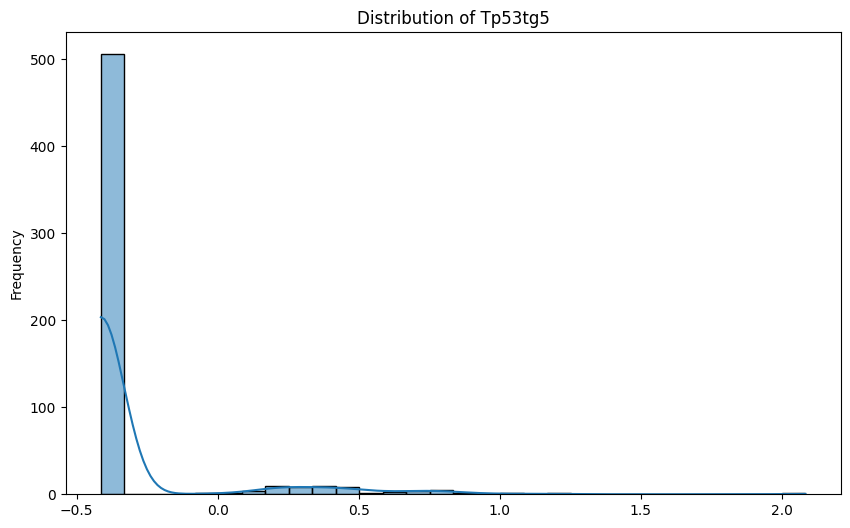

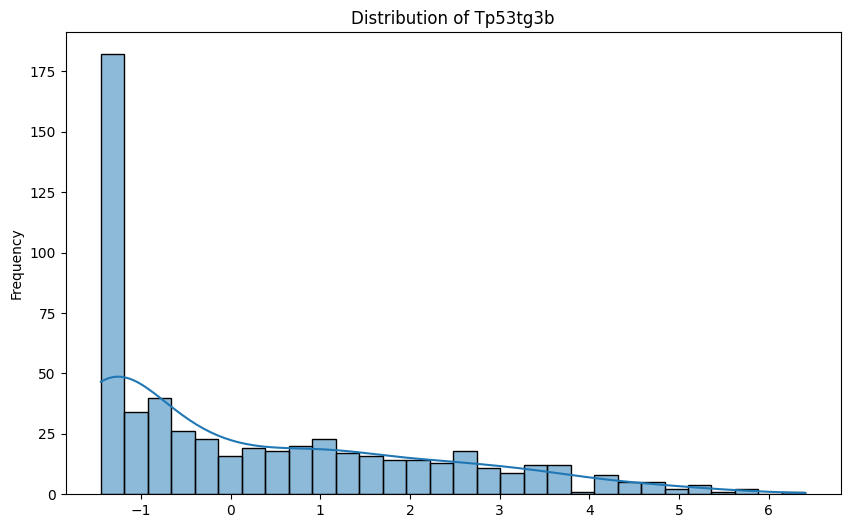

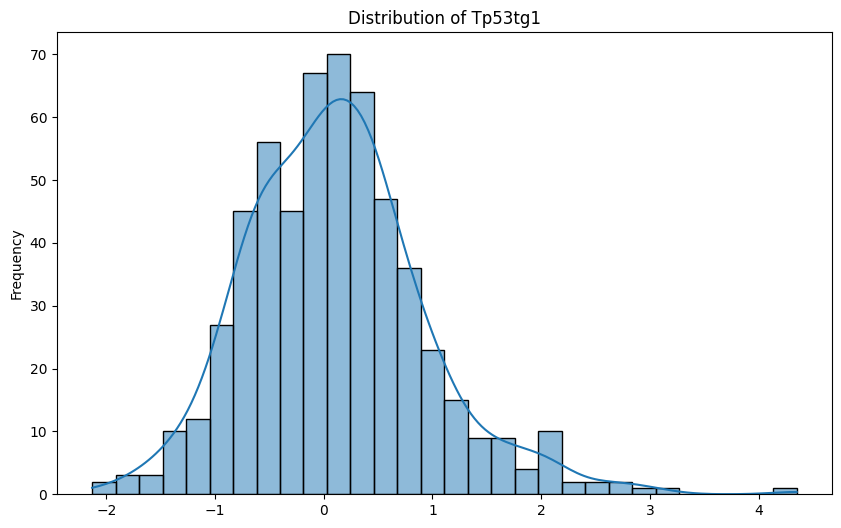

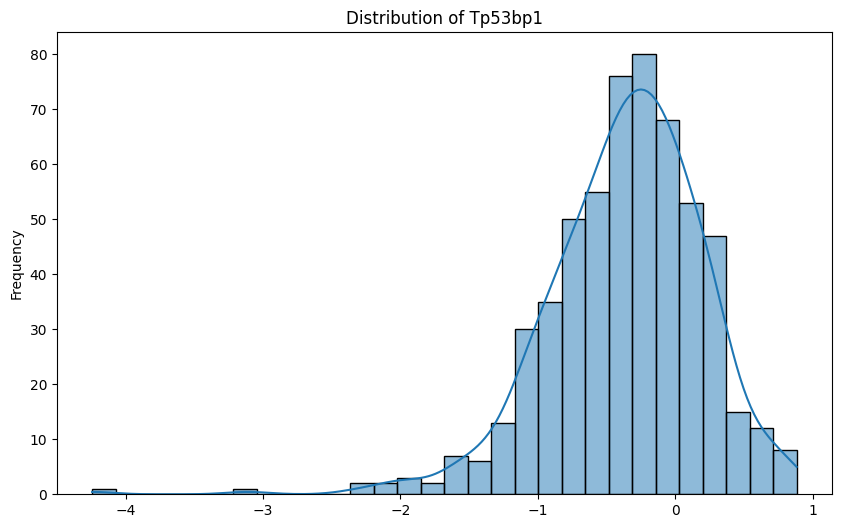

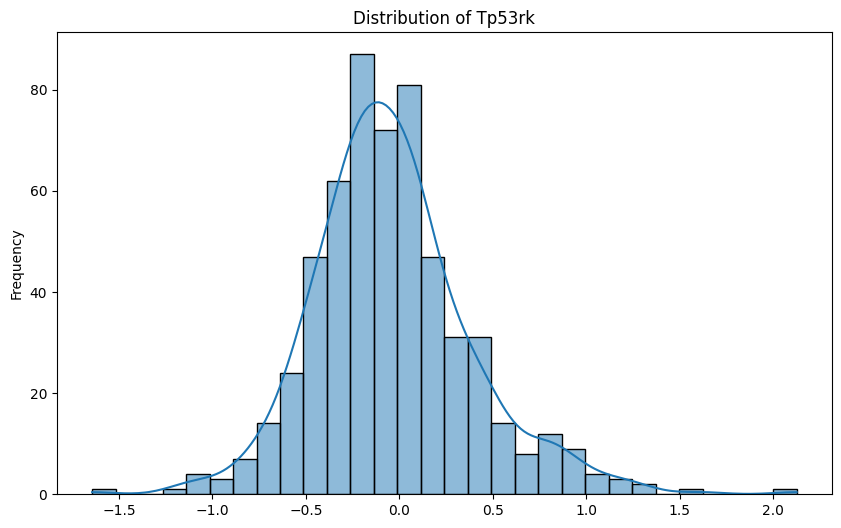

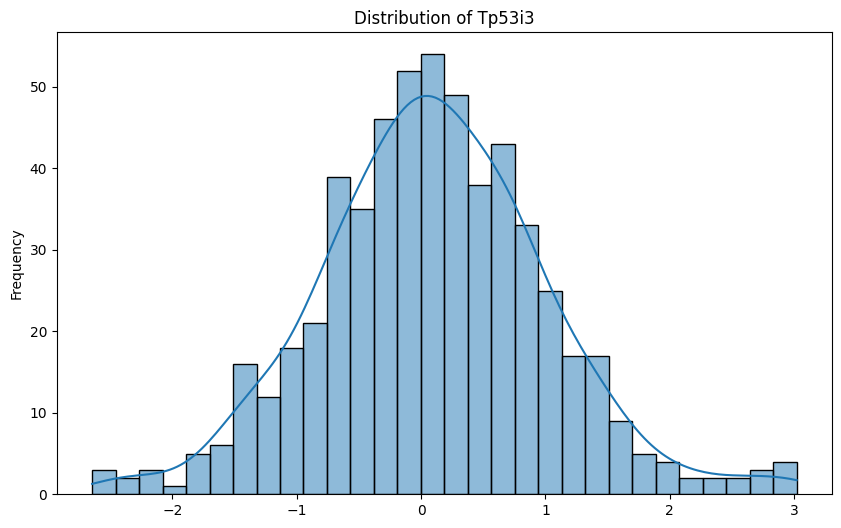

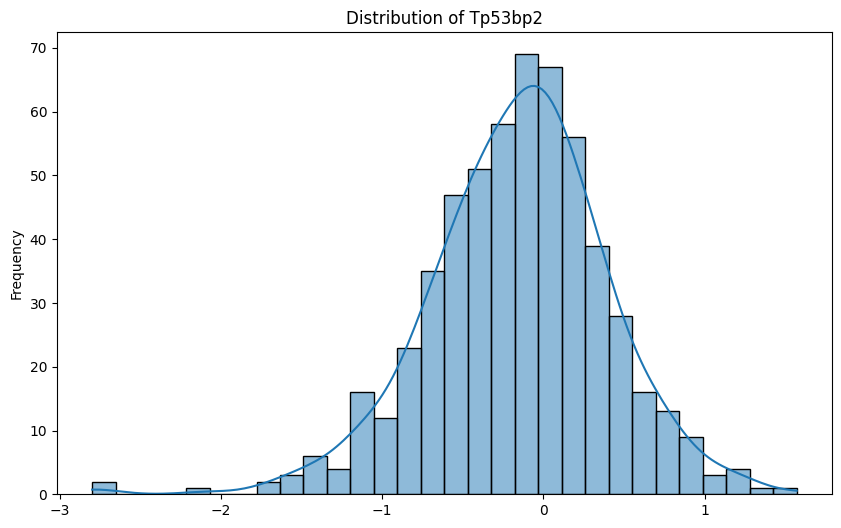

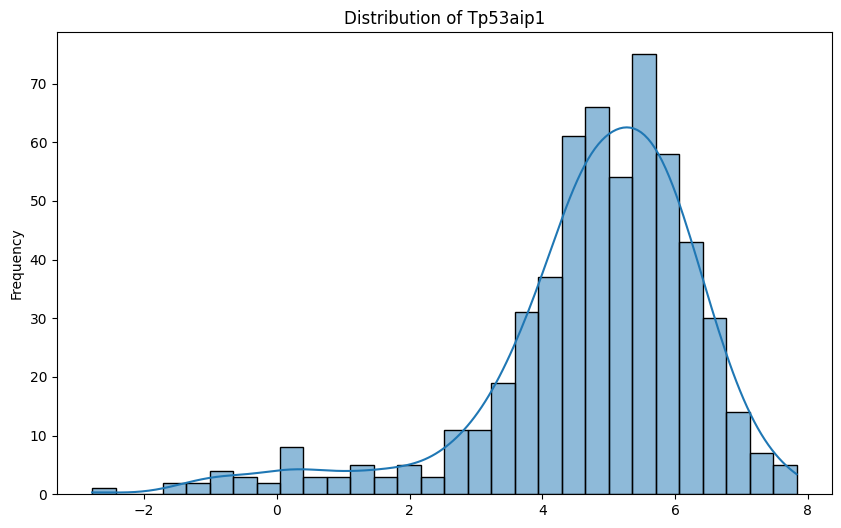

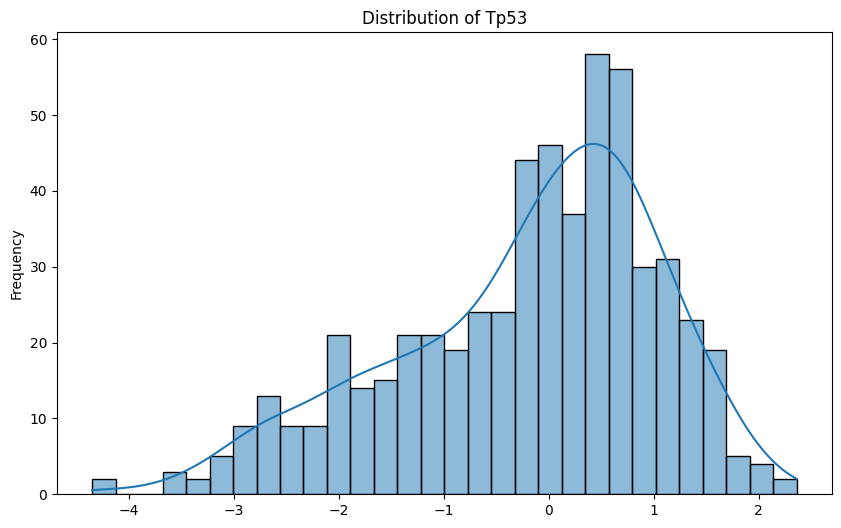

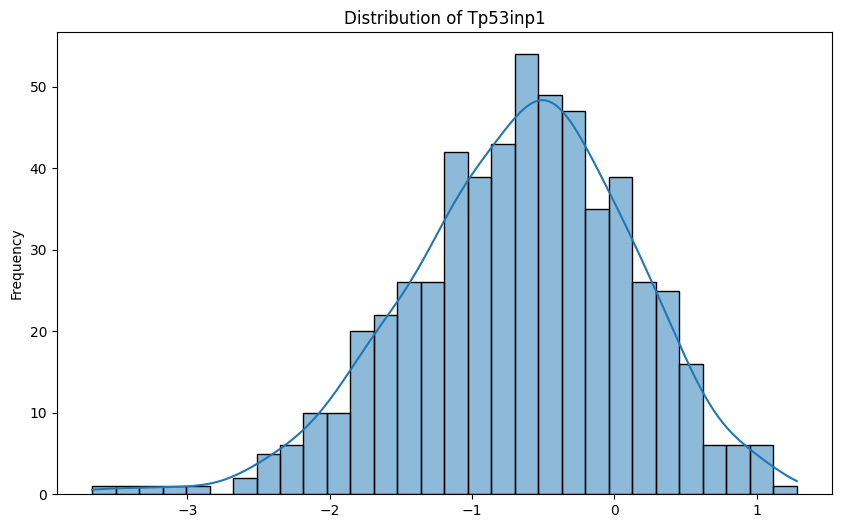

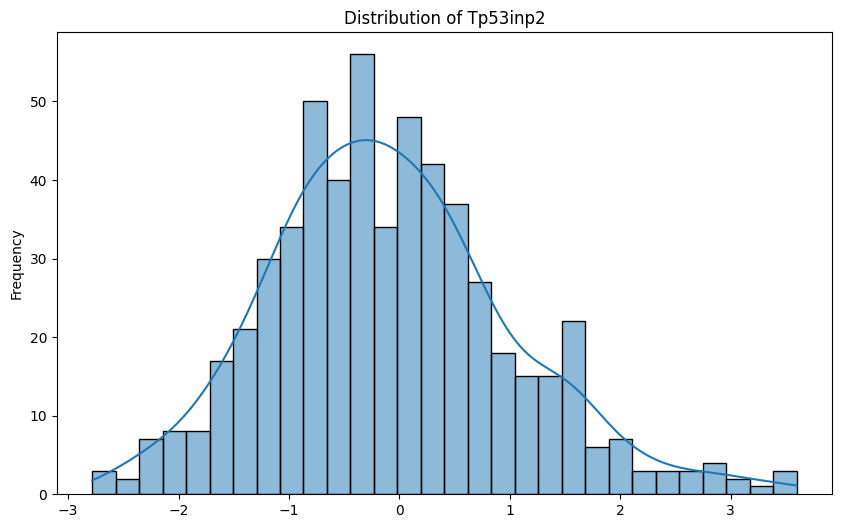

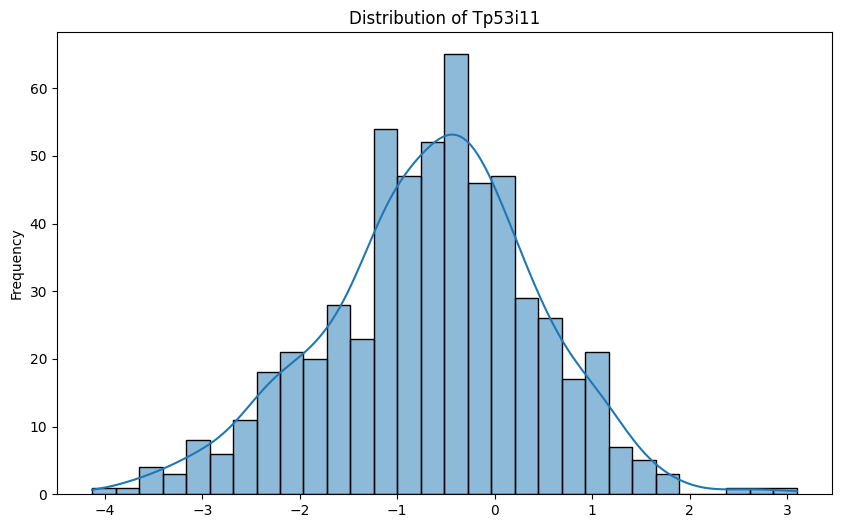

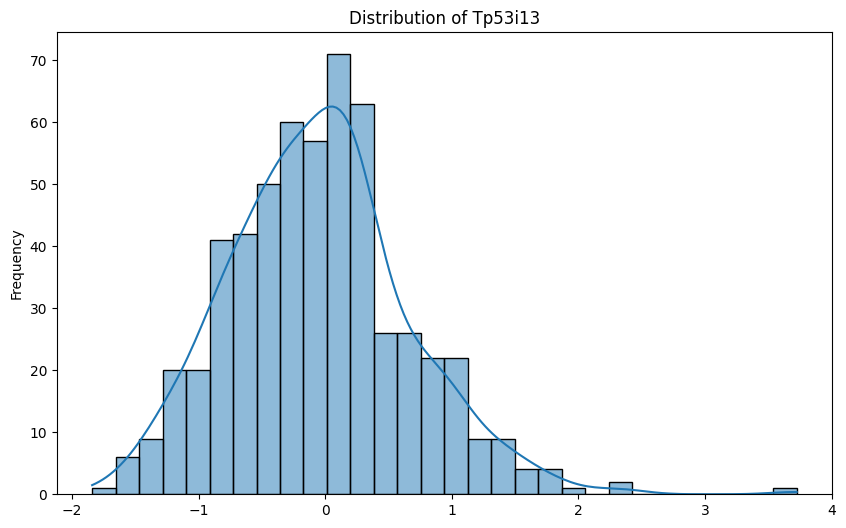

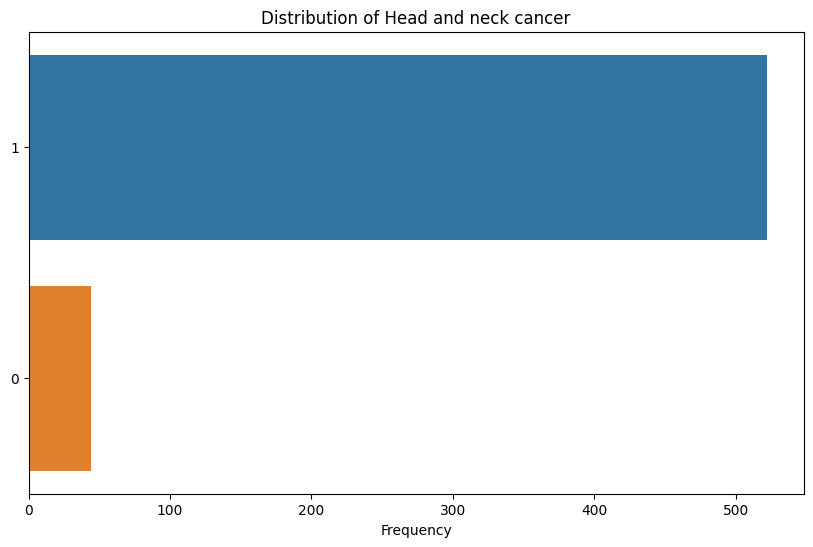

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)
interested_genes = [col for col in gene_list if 'tp53' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])

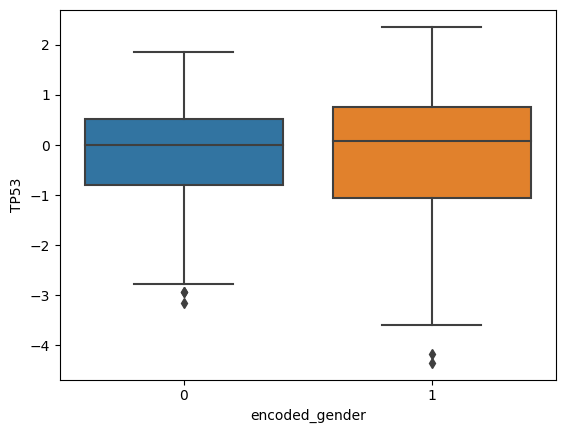

In [10]:
sns.boxplot(data=merged_data, y='TP53', x=condition_col)
plt.show()

In [11]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [12]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-11-0fccbbd2148b>:8: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-11-0fccbbd2148b>:13: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 84.20% ± 2.86%


In [13]:
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
var_select.fit(X, y)
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]


<ipython-input-11-0fccbbd2148b>:8: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


In [14]:

import pandas as pd
from statsmodels.stats.multitest import multipletests
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})
condition_effect = regression_df.iloc[0]
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: Gender
Coefficient: -0.0005
p-value: 0.9517



In [15]:

threshold = 0.05
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

Genes with corrected p-value < 0.05, affecting the trait Head and Neck Cancer conditional on the factor Gender, sorted by corrected p-value:
   Variable  Coefficient  corrected_p_value
    SNORD16    -0.461131           0.000000
    DEFB136    -0.461131           0.000000
  LOC653545    -0.461131           0.000000
   SNORD88C    -0.461131           0.000000
     SNORD8    -0.461131           0.000000
    DEFB114     0.461131           0.000000
   SNORD88B    -0.461131           0.000000
  KRTAP22-1    -0.461131           0.000000
    SNAR-A2     0.461131           0.000000
    DEFB135     0.461131           0.000000
     TTTY21     0.461131           0.000000
     SNORD9    -0.461131           0.000000
  KRTAP25-1    -0.461131           0.000000
   SNORA11C    -0.461131           0.000000
SNORD116-19     0.461131           0.000000
    CT47A10    -0.461131           0.000000
     TXNDC8    -0.461131           0.000000
   SNAR-A13     0.461131           0.000000
      TSSK2    -0.46113